In [20]:
# po co chcemy robic te analize? wyznaczyc jasny cel, metody, wnioski, na koncu polecic kaggle.com,
# a na slajdzie strone ds i git

#instrukcja jak pobrac ten notebook i dane, jak uruchomic calosc 
# po angielsku, bo wiekszosc materialow jest po angielsku i trzeba sie przyzwyczajac

# Mowa - po co to robimy! lista powodów, lista problemów

# K-Means Clustering
Unsupervised discrete learning - Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group.

In [ ]:
# how the k-means works!

# Preparing the data
Data set comes from kaggle https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python 
"Content:
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data. Problem Statement You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly."

## Imports necessary libraries

In [38]:
from IPython.display import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from shapely.geometry import Point, Polygon
%matplotlib notebook

## Loads data set from csv

In [8]:
df = pd.read_csv('Mall_Customers.csv')

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Checks if there are any missing values in the data set

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Changes categorical data to numerical

In [13]:
df['Gender'] = df['Gender'].astype('category')
# one hot encoding???
df['Gender'] = df['Gender'].cat.codes

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Basic analysis 

## Correlations between given features

In [17]:
# wytlumaczenie korelacji i punktacji, i ze moze byc ujemna

In [21]:
df.corr(method='pearson')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


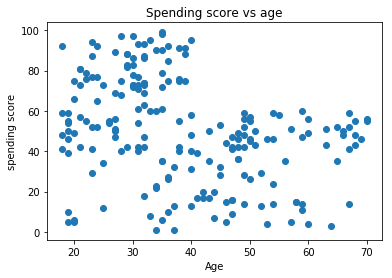

In [18]:
x = df['Age']
y= df['Spending Score (1-100)']
plt.scatter(x,y)
plt.ylabel('spending score')
plt.xlabel('Age')
plt.title('Spending score vs age')
plt.show()

In [ ]:
# jak dziala k-mean i jak wybrac wartosc k? plusy i minusy tego algorytmu 

In [ ]:
# zrobic test, raz gender jedno, a raz one hot encoding do modelu

## Min-Max scaler / StandardScaler

## Determining the number of clusters (value of K)

In [25]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

In [28]:
# uzasadnienie wyboru k z wykresu !

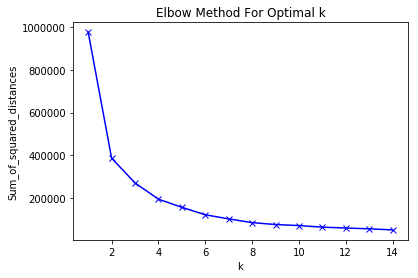

In [26]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Reshaping the data from 1D to 2D (because of algorithm requirements)

In [32]:
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Array with Annual Income and Spending Score values

In [35]:
x = df.iloc[:, [3, 4]].values

## Applying the algorithm to the data

In [ ]:
# how to change the number of clusters

<IPython.core.display.Javascript object>


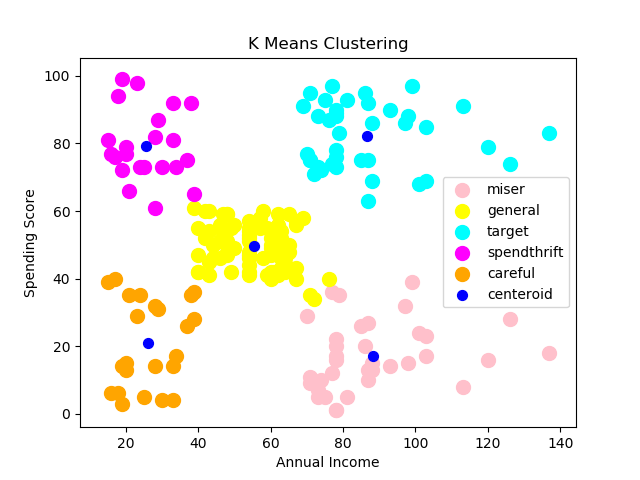

In [41]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
# drugi notebook do uzupełniania rzeczy, z komentarzami i dziurami
# do każdego punktu definicje, w razie pytan, np. korelacja, rodzaj i tak dalej